In [1]:
from tensorflow import keras
import matplotlib.pyplot as plt
import soundfile as sf
import pandas as pd
import signalnet as sn
from scipy.spatial.distance import cosine
import numpy as np
from sklearn.metrics import mean_squared_error
import soundfile as sf

In [2]:
model_1 = keras.models.load_model("lstm_1")
model_2 = keras.models.load_model("lstm_2")
model_3 = keras.models.load_model("lstm_3_huber")
model_4 = keras.models.load_model("lstm_4_huber")
model_5 = keras.models.load_model("lstm_5_huber")
model_6 = keras.models.load_model("lstm_6_mse")

In [3]:
df = pd.read_csv("data/digital_training_data.csv")
df = df.loc[500000:1500000,:]

# LSTM with a lookback window of 5, 25 epochs of training and MSE loss

In [4]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 128)               66560     
                                                                 
 dense (Dense)               (None, 256)               33024     
                                                                 
 dense_1 (Dense)             (None, 32)                8224      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 107,841
Trainable params: 107,841
Non-trainable params: 0
_________________________________________________________________


In [5]:
X_train, X_test, y_train, y_test, noframe_test = sn.utilities.lstm_prep(df, 5)

In [6]:
pred = model_1.predict(X_test)

2023-05-03 13:46:58.279145: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


15625/15625 [==============================] - 16s 1ms/step


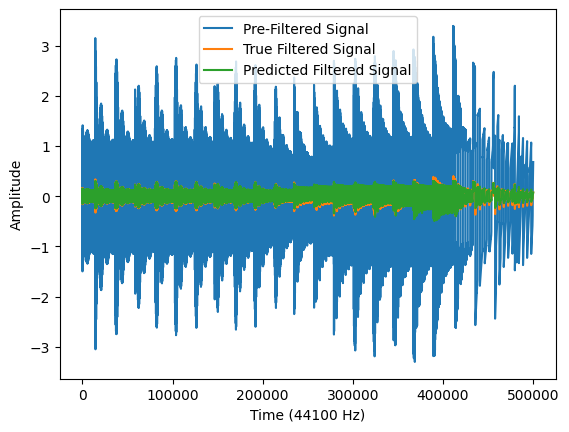

In [7]:
plt.plot(noframe_test, label="Pre-Filtered Signal")
plt.plot(y_test, label="True Filtered Signal")
plt.plot(pred, label="Predicted Filtered Signal")
plt.xlabel("Time (44100 Hz)")
plt.ylabel("Amplitude")
plt.legend()
plt.show()

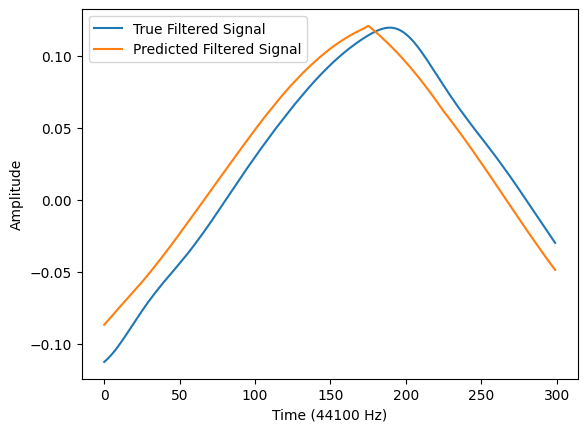

In [8]:
plt.plot(y_test[3000:3300], label="True Filtered Signal")
plt.plot(pred[3000:3300], label="Predicted Filtered Signal")
plt.xlabel("Time (44100 Hz)")
plt.ylabel("Amplitude")
plt.legend()
plt.show()

In [9]:
print("Cosine similarity of predicted to test set: ", 1 - cosine(y_test, np.reshape(pred, (pred.shape[0]))))
print("MSE of predicted to test set: ", mean_squared_error(y_test, np.reshape(pred, (pred.shape[0]))))

Cosine similarity of predicted to test set:  0.8506673025041798
MSE of predicted to test set:  0.003536614583346885


In [10]:
sf.write("model_1.wav", pred, samplerate=44100)
sf.write("ground_truth.wav", y_test, samplerate=44100)

# LSTM with a lookback window of 10, 25 epochs of training and MSE loss

In [11]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 128)               66560     
                                                                 
 dense_3 (Dense)             (None, 256)               33024     
                                                                 
 dense_4 (Dense)             (None, 32)                8224      
                                                                 
 dense_5 (Dense)             (None, 1)                 33        
                                                                 
Total params: 107,841
Trainable params: 107,841
Non-trainable params: 0
_________________________________________________________________


In [12]:
X_train, X_test, y_train, y_test, noframe_test = sn.utilities.lstm_prep(df, 10)

In [13]:
pred = model_2.predict(X_test)

15625/15625 [==============================] - 30s 2ms/step


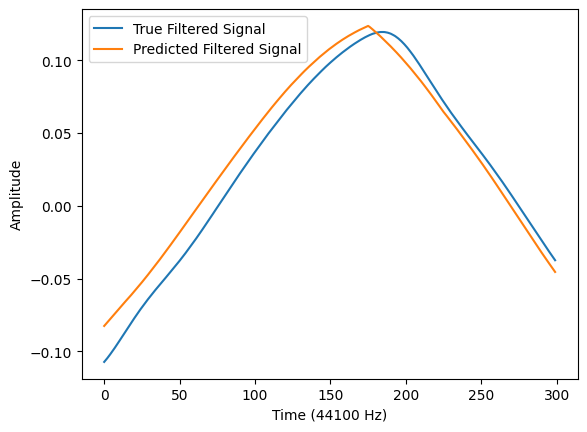

In [14]:
plt.plot(y_test[3000:3300], label="True Filtered Signal")
plt.plot(pred[3000:3300], label="Predicted Filtered Signal")
plt.xlabel("Time (44100 Hz)")
plt.ylabel("Amplitude")
plt.legend()
plt.show()

In [15]:
print("Cosine similarity of predicted to test set: ", 1 - cosine(y_test, np.reshape(pred, (pred.shape[0]))))
print("MSE of predicted to test set: ", mean_squared_error(y_test, np.reshape(pred, (pred.shape[0]))))

Cosine similarity of predicted to test set:  0.8995583284674112
MSE of predicted to test set:  0.002378210848846961


In [16]:
sf.write("model_2.wav", pred, samplerate=44100)

# LSTM with a lookback window of 10, 25 epochs of training, and Huber loss

In [17]:
model_3.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_5 (LSTM)               (None, 128)               66560     
                                                                 
 dense_15 (Dense)            (None, 256)               33024     
                                                                 
 dense_16 (Dense)            (None, 32)                8224      
                                                                 
 dense_17 (Dense)            (None, 1)                 33        
                                                                 
Total params: 107,841
Trainable params: 107,841
Non-trainable params: 0
_________________________________________________________________


In [18]:
X_train, X_test, y_train, y_test, noframe_test = sn.utilities.lstm_prep(df, 10)

In [19]:
pred = model_3.predict(X_test)

15625/15625 [==============================] - 30s 2ms/step


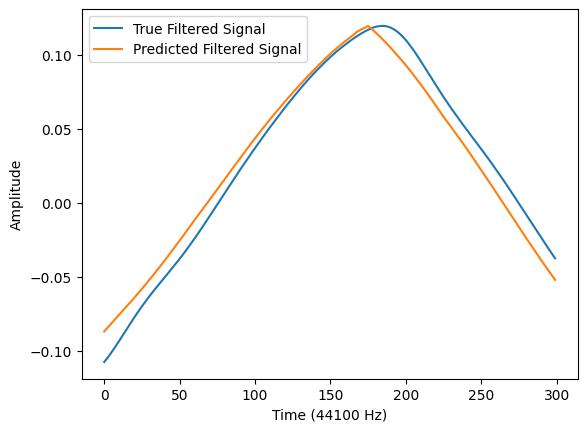

In [20]:
plt.plot(y_test[3000:3300], label="True Filtered Signal")
plt.plot(pred[3000:3300], label="Predicted Filtered Signal")
plt.xlabel("Time (44100 Hz)")
plt.ylabel("Amplitude")
plt.legend()
plt.show()

In [21]:
print("Cosine similarity of predicted to test set: ", 1 - cosine(y_test, np.reshape(pred, (pred.shape[0]))))
print("MSE of predicted to test set: ", mean_squared_error(y_test, np.reshape(pred, (pred.shape[0]))))

Cosine similarity of predicted to test set:  0.9016435459978126
MSE of predicted to test set:  0.0023222814592601827


In [22]:
sf.write("model_3.wav", pred, samplerate=44100)

# LSTM with a lookback window of 20, 25 epochs of training, and Huber loss

In [23]:
model_4.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 128)               66560     
                                                                 
 dense_18 (Dense)            (None, 256)               33024     
                                                                 
 dense_19 (Dense)            (None, 32)                8224      
                                                                 
 dense_20 (Dense)            (None, 1)                 33        
                                                                 
Total params: 107,841
Trainable params: 107,841
Non-trainable params: 0
_________________________________________________________________


In [24]:
X_train, X_test, y_train, y_test, noframe_test = sn.utilities.lstm_prep(df, 20)

In [25]:
pred = model_4.predict(X_test)

15625/15625 [==============================] - 54s 3ms/step


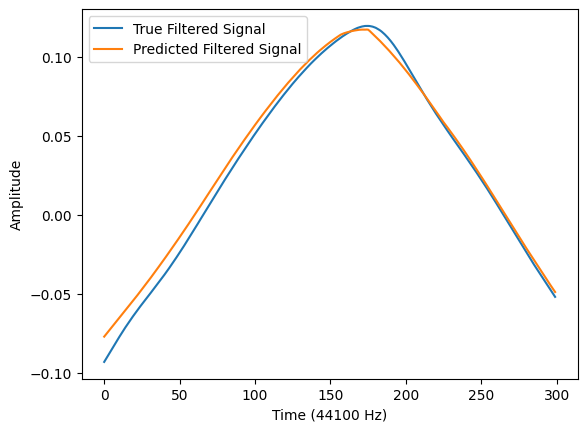

In [26]:
plt.plot(y_test[3000:3300], label="True Filtered Signal")
plt.plot(pred[3000:3300], label="Predicted Filtered Signal")
plt.xlabel("Time (44100 Hz)")
plt.ylabel("Amplitude")
plt.legend()
plt.show()

In [27]:
print("Cosine similarity of predicted to test set: ", 1 - cosine(y_test, np.reshape(pred, (pred.shape[0]))))
print("MSE of predicted to test set: ", mean_squared_error(y_test, np.reshape(pred, (pred.shape[0]))))

Cosine similarity of predicted to test set:  0.9675684852337234
MSE of predicted to test set:  0.0007987299602170876


In [28]:
sf.write("model_4.wav", pred, samplerate=44100)

# LSTM with a lookback window of 20, 50 epochs, Huber loss and an expanded architecture (more fully connected layers)

In [29]:
model_5.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_7 (LSTM)               (None, 128)               66560     
                                                                 
 dense_21 (Dense)            (None, 256)               33024     
                                                                 
 dense_22 (Dense)            (None, 64)                16448     
                                                                 
 dense_23 (Dense)            (None, 32)                2080      
                                                                 
 dense_24 (Dense)            (None, 1)                 33        
                                                                 
Total params: 118,145
Trainable params: 118,145
Non-trainable params: 0
_________________________________________________________________


In [30]:
X_train, X_test, y_train, y_test, noframe_test = sn.utilities.lstm_prep(df, 20)

In [31]:
pred = model_5.predict(X_test)

15625/15625 [==============================] - 52s 3ms/step


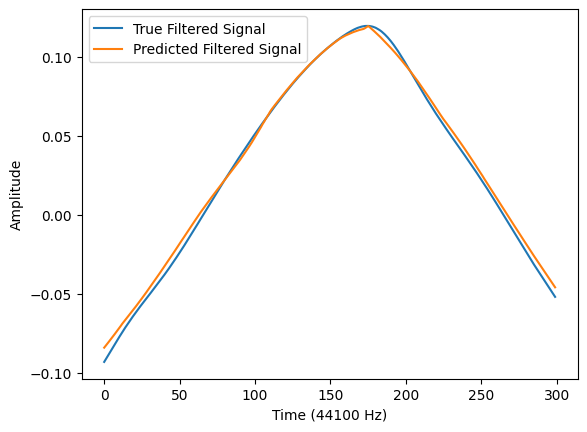

In [32]:
plt.plot(y_test[3000:3300], label="True Filtered Signal")
plt.plot(pred[3000:3300], label="Predicted Filtered Signal")
plt.xlabel("Time (44100 Hz)")
plt.ylabel("Amplitude")
plt.legend()
plt.show()

In [33]:
print("Cosine similarity of predicted to test set: ", 1 - cosine(y_test, np.reshape(pred, (pred.shape[0]))))
print("MSE of predicted to test set: ", mean_squared_error(y_test, np.reshape(pred, (pred.shape[0]))))

Cosine similarity of predicted to test set:  0.9688701606333148
MSE of predicted to test set:  0.0007599612595059656


In [34]:
sf.write("model_5.wav", pred, samplerate=44100)

# LSTM with lookback window of 20, 50 epochs, MSE loss and the same expanded architecture

model_6.summary()

In [35]:
X_train, X_test, y_train, y_test, noframe_test = sn.utilities.lstm_prep(df, 20)

In [36]:
pred = model_6.predict(X_test)

15625/15625 [==============================] - 59s 4ms/step


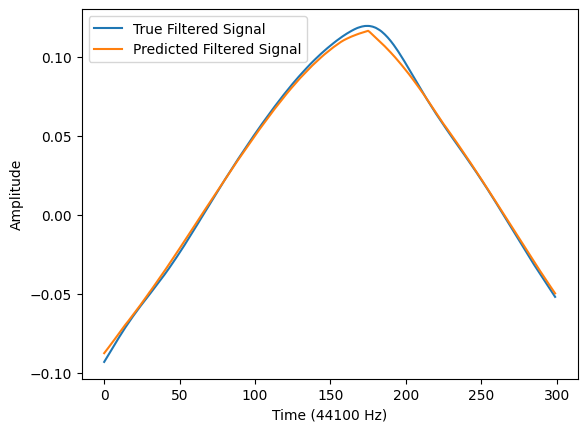

In [37]:
plt.plot(y_test[3000:3300], label="True Filtered Signal")
plt.plot(pred[3000:3300], label="Predicted Filtered Signal")
plt.xlabel("Time (44100 Hz)")
plt.ylabel("Amplitude")
plt.legend()
plt.show()

In [38]:
print("Cosine similarity of predicted to test set: ", 1 - cosine(y_test, np.reshape(pred, (pred.shape[0]))))
print("MSE of predicted to test set: ", mean_squared_error(y_test, np.reshape(pred, (pred.shape[0]))))

Cosine similarity of predicted to test set:  0.969813505877029
MSE of predicted to test set:  0.0007380910522393244


In [39]:
sf.write("model_6.wav", pred, samplerate=44100)